In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, LearningCurveDisplay, learning_curve, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

dataset = fetch_california_housing(as_frame=True)

print(dataset.DESCR)
print(dataset.frame)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [19]:

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

df['PRICE'] = dataset.target

nb_nulls = df.isnull().sum() 

print(nb_nulls)


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [20]:

X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<Axes: >

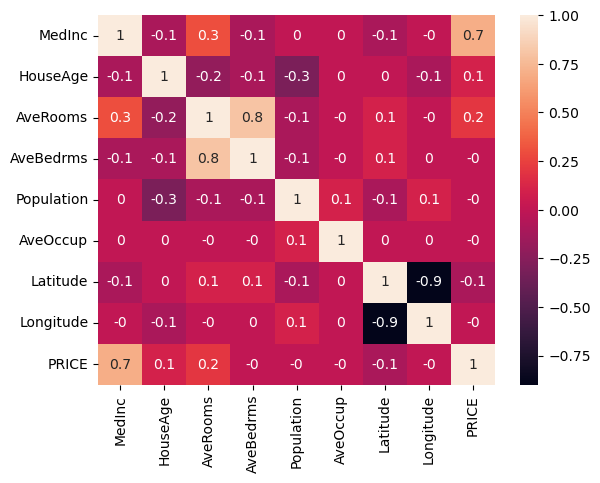

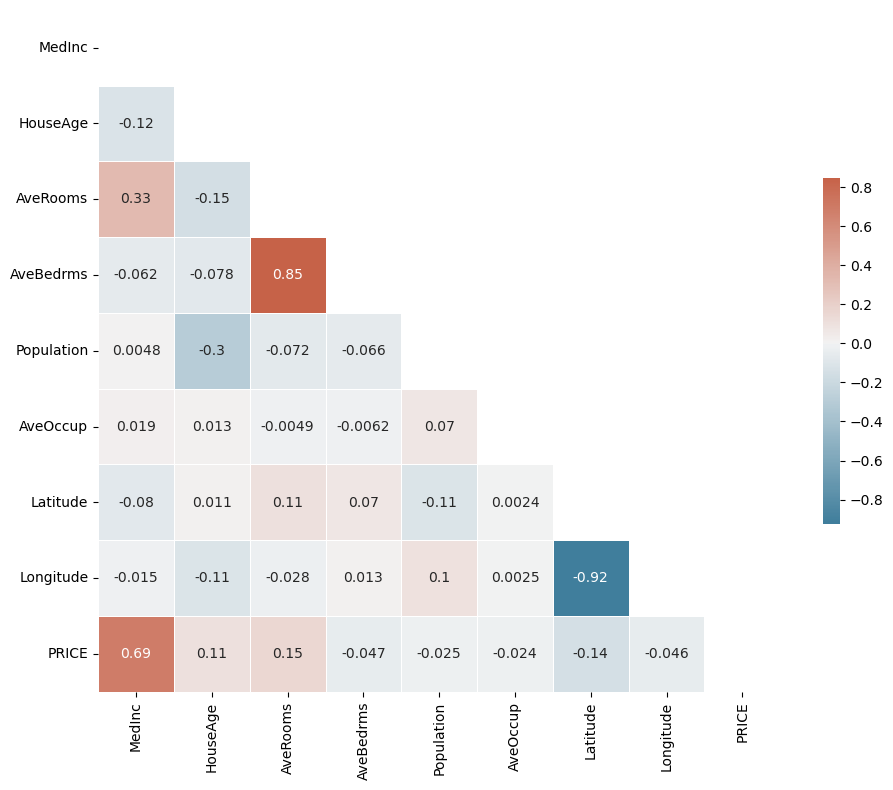

In [21]:

matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

corr = df.corr()
 
mask = np.triu(np.ones_like(corr, dtype=bool))
 
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={ 'shrink': .5 }, annot=True)


In [22]:

selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [24]:

# train evaluation

lr = LinearRegression() 
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print(rmse)

r2 = r2_score(y_train, y_train_pred)

print(r2)


0.7314188174268145
0.6002802761968506


In [25]:

# test evaluation

y_test_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(rmse)

r2 = r2_score(y_test, y_test_pred)

print(r2)


0.7414501124382495
0.5783993232750753


In [26]:

#### REGULARIZATION ####

def reg(model, alpha):
    if model == 'Lasso':
        _reg = Lasso(alpha=alpha)
    elif model == 'Ridge':
        _reg = Ridge(alpha=alpha)
    _reg.fit(X_train, y_train)
    y_pred = _reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(model + ' MSE with alpha ' + str(alpha) + ':', mse)

for model in ['Lasso', 'Ridge']:
    print()
    for alpha in [0.1, 1, 10]:
        reg(model, alpha)

print()



Lasso MSE with alpha 0.1: 0.6196149319559707
Lasso MSE with alpha 1: 0.9375991453077096
Lasso MSE with alpha 10: 1.3040961146894736

Ridge MSE with alpha 0.1: 0.5497483777594313
Ridge MSE with alpha 1: 0.5497493593136819
Ridge MSE with alpha 10: 0.5497596508738997



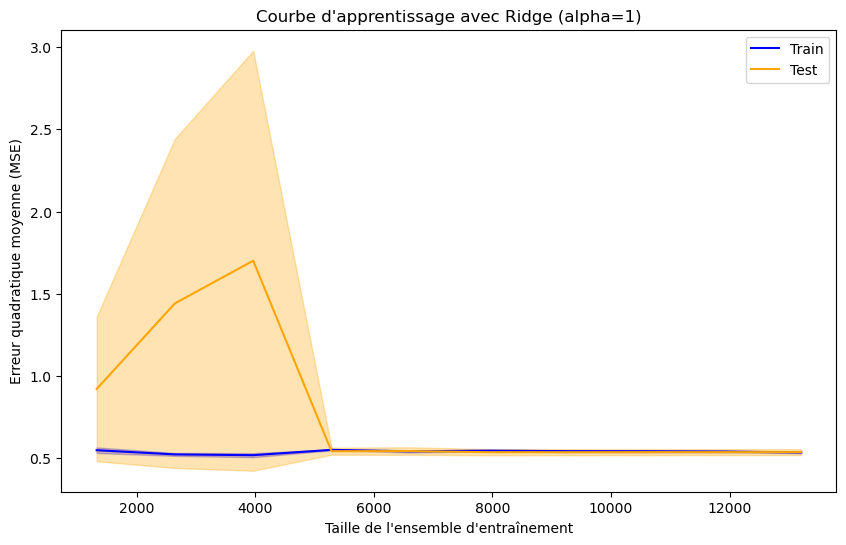

In [29]:

#### Learning curve with Ridge && alpha = 1

ridge = Ridge(alpha=1)

train_sizes, train_scores, test_scores = learning_curve(
    ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Test', color='orange')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='orange', alpha=0.3)

# customization
plt.title('Courbe d\'apprentissage avec Ridge (alpha=1)')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Erreur quadratique moyenne (MSE)')
plt.legend()
plt.show()


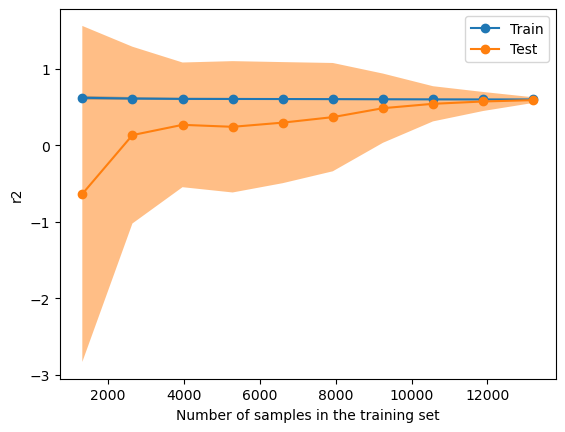

In [31]:

common_params = {
    
    'X': X_train,
    'y': y_train,
    'train_sizes': np.linspace(0.1, 1.0, 10),
    'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    'score_type': 'both',
    'n_jobs': -1,
    'line_kw': { 'marker': 'o' },
    'std_display_style': 'fill_between',
    'score_name': 'r2'
    
}

LearningCurveDisplay.from_estimator(lr, **common_params)
